<a href="https://colab.research.google.com/github/Rahma-Ahmed22/Inventory-Analysis/blob/main/Inventory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Visualization and other setups
import matplotlib.pyplot as plt #
import seaborn as sns
import matplotlib_inline.backend_inline
from matplotlib.dates import DateFormatter
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

#Set plot style
def set_default_style():
    plt.style.use(['ggplot'])
    plt.rc('axes', edgecolor='w', titlesize=12, titleweight='bold', labelsize=11, labelcolor='tab:blue',
           labelweight='bold', grid=False)
    plt.rc('text', color='tomato')
    plt.rc('xtick', labelsize=10, color='tab:blue')
    plt.rc('ytick', labelsize=10, color='tab:blue')
    plt.rc('figure', figsize=(10, 4), dpi=150)
set_default_style()

#set max display for convinience
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 200)

#Data Exploration


In [ ]:
purshase_prices2017 = pd.read_csv('/content/2017PurchasePricesDec.csv')
purshase_prices2016 = pd.read_csv('/content/PurchasesFINAL12312016.csv')
Begin_Inv = pd.read_csv('/content/BegInvFINAL12312016.csv')
End_Inv = pd.read_csv('/content/EndInvFINAL12312016.csv')
Invoice_purshase2016 = pd.read_csv('/content/InvoicePurchases12312016.csv')
Sales2016=pd.read_csv ('/content/SalesFINAL12312016.csv')

In [ ]:
#Explore the datasets
def explore_dataset(dataframe):
    summary = []
    for column in dataframe.columns:
        data_type = dataframe[column].dtype
        total_count = len(dataframe[column])
        unique_count = dataframe[column].nunique()
        unique_sample = dataframe[column].unique()[0:10]
        missing_values = dataframe[column].isnull().sum()
        summary.append({'Column': column, 'Data Type': data_type, 'total count': total_count,
                        'Unique Count': unique_count, 'Unique Sample': unique_sample,
                        'Missing Values': missing_values})
    return pd.DataFrame(summary)

## Explore all dataset in one go-- make sure IDE displays maximum output with side scrolling.
datasets = [("Beginning Inventory", Begin_Inv),
            ("Ending Inventory", End_Inv),
            ("Purchase", purshase_prices2016),
            ("Purchase Invoices", Invoice_purshase2016),
            ("Purchase Price", purshase_prices2017),
            ("Sales", Sales2016)]

for index, (dataset_name, dataset) in enumerate(datasets, start=1):
    print(f"{index}. Explore {dataset_name} dataset key details:")
    print(explore_dataset(dataset))
    print("\n")

1. Explore Beginning Inventory dataset key details:
        Column Data Type  total count  Unique Count                                      Unique Sample  Missing Values
0  InventoryId    object       206529        206529  [1_HARDERSFIELD_58, 1_HARDERSFIELD_60, 1_HARDE...               0
1        Store     int64       206529            79                    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]               0
2         City    object       206529            67  [HARDERSFIELD, ASHBORNE, HORNSEY, EANVERNESS, ...               0
3        Brand     int64       206529          8094         [58, 60, 62, 63, 72, 75, 77, 79, 115, 120]               0
4  Description    object       206529          7291  [Gekkeikan Black & Gold Sake, Canadian Club 18...               0
5         Size    object       206529            41  L, Liter, 1.75L, 50mL, 375mL, 50mL 4 Pk, ...               0
6       onHand     int64       206529           474                  [8, 7, 6, 3, 18, 2, 5, 11, 17, 0]               0
7

In [ ]:
#identity missing values and duplicates
def check_missing_and_duplicates(*datasets):
    for dataset_name, dataset in datasets:
        missing_values_count = {}
        duplicates_count = {}

        # Check missing values amd duplicates
        for column_name in dataset.columns:
            missing_count = dataset[column_name].isnull().sum()
            if missing_count > 0:
                missing_values_count[column_name] = missing_count

        duplicates = dataset[dataset.duplicated()]
        duplicates_count["total"] = len(duplicates)

          # Print summary
        print(f"Missing values and duplicates summary for {dataset_name}:")
        if len(missing_values_count) == 0:
            print("No missing values in this dataset.")
        else:
            print("Missing Values:")
            for column_name, count in missing_values_count.items():
                print(f" - Column: {column_name}, Missing Values Count: {count}")

        if duplicates_count["total"] == 0:
            print("No duplicates in this dataset.")
        else:
            print("Duplicates:")
            print(f" - Total duplicates: {duplicates_count['total']}")
        print()  # Add newline between each dataset summary

check_missing_and_duplicates(("Beginning Inventory", Begin_Inv),
            ("Ending Inventory", End_Inv),
            ("Purchase", purshase_prices2016),
            ("Purchase Invoices", Invoice_purshase2016),
            ("Purchase Price", purshase_prices2017),
            ("Sales", Sales2016))

Missing values and duplicates summary for Beginning Inventory:
No missing values in this dataset.
No duplicates in this dataset.

Missing values and duplicates summary for Ending Inventory:
Missing Values:
 - Column: City, Missing Values Count: 1284
No duplicates in this dataset.

Missing values and duplicates summary for Purchase:
Missing Values:
 - Column: Size, Missing Values Count: 3
 - Column: PurchasePrice, Missing Values Count: 1
 - Column: Quantity, Missing Values Count: 1
 - Column: Dollars, Missing Values Count: 1
 - Column: Classification, Missing Values Count: 1
No duplicates in this dataset.

Missing values and duplicates summary for Purchase Invoices:
Missing Values:
 - Column: Approval, Missing Values Count: 5169
No duplicates in this dataset.

Missing values and duplicates summary for Purchase Price:
Missing Values:
 - Column: Description, Missing Values Count: 1
 - Column: Size, Missing Values Count: 1
 - Column: Volume, Missing Values Count: 1
No duplicates in this da

In [ ]:
# Checking for missing data in each dataset
datasets = [("Beginning Inventory", Begin_Inv),
            ("Ending Inventory", End_Inv),
            ("Purchase", purshase_prices2016),
            ("Purchase Invoices", Invoice_purshase2016),
            ("Purchase Price", purshase_prices2017),
            ("Sales", Sales2016)]

for name, data in datasets:
    missing_values = data.isnull().sum()
    non_zero_missing_values = missing_values[missing_values > 0]

    if not non_zero_missing_values.empty:
        print(f"\nMissing values in {name}:")
        print(non_zero_missing_values)


Missing values in Ending Inventory:
City    1284
dtype: int64

Missing values in Purchase:
Size              3
PurchasePrice     1
Quantity          1
Dollars           1
Classification    1
dtype: int64

Missing values in Purchase Invoices:
Approval    5169
dtype: int64

Missing values in Purchase Price:
Description    1
Size           1
Volume         1
dtype: int64


In [ ]:
end_city_stor_dict = {}

# Iterate over rows in Begin_Inv DataFrame (assuming it exists)
for index, row in End_Inv.iterrows():
    city = row['City']
    store = row['Store']
    end_city_stor_dict[city] = store

print(end_city_stor_dict)

{'HARDERSFIELD': 72, 'ASHBORNE': 2, 'HORNSEY': 33, 'EANVERNESS': 67, 'SUTTON': 5, 'GOULCREST': 38, 'STANMORE': 7, 'ALNERWICK': 8, 'BLACKPOOL': 9, 'CARDEND': 11, 'LEESIDE': 12, 'TARMSWORTH': 13, 'BROMWICH': 14, 'WANBORNE': 15, 'LUNDY': 16, 'OLDHAM': 17, 'FURNESS': 18, 'WINTERVALE': 19, 'BREDWARDINE': 20, 'BALERNO': 21, 'SHARNWICK': 22, 'ARBINGTON': 23, 'PALPERROTH': 24, 'CAERSHIRE': 25, "KNIFE'S EDGE": 26, 'MOUNTMEND': 69, 'LARNWICK': 41, 'AYLESBURY': 29, 'CULCHETH': 30, 'PITMERDEN': 34, 'HALIVAARA': 35, 'LEWES': 36, 'PAETHSMOUTH': 37, 'EASTHALLOW': 39, 'BULLMAR': 40, 'BLACK HOLLOW': 42, 'WOLFORD': 43, 'PORTHCRAWL': 44, 'VERITAS': 45, nan: 46, "PELLA'S WISH": 47, 'NORFOLK': 48, 'GARIGILL': 49, 'ABERDEEN': 51, 'GRAYCOTT': 52, 'HILLFAR': 53, 'GUTHRAM': 54, 'DRY GULCH': 55, "BEGGAR'S HOLE": 56, 'LANTEGLOS': 57, 'HARTLEPOOL': 58, 'CLAETHORPES': 59, 'IRRAGIN': 60, 'AETHELNEY': 61, 'KILMARNOCK': 62, 'SWORDBREAK': 63, 'CESTERFIELD': 64, 'LUTON': 65, 'SOLARIS': 68, 'KELD': 70, 'CLARCTON': 71, '

In [ ]:
beg_city_stor_dict = {}

# Iterate over rows in Begin_Inv DataFrame (assuming it exists)
for index, row in Begin_Inv.iterrows():
    city = row['City']
    store = row['Store']
    beg_city_stor_dict[store] = city

print(beg_city_stor_dict)

{1: 'HARDERSFIELD', 2: 'ASHBORNE', 3: 'HORNSEY', 4: 'EANVERNESS', 5: 'SUTTON', 6: 'GOULCREST', 7: 'STANMORE', 8: 'ALNERWICK', 9: 'BLACKPOOL', 10: 'HORNSEY', 11: 'CARDEND', 12: 'LEESIDE', 13: 'TARMSWORTH', 14: 'BROMWICH', 15: 'WANBORNE', 16: 'LUNDY', 17: 'OLDHAM', 18: 'FURNESS', 19: 'WINTERVALE', 20: 'BREDWARDINE', 21: 'BALERNO', 22: 'SHARNWICK', 23: 'ARBINGTON', 24: 'PALPERROTH', 25: 'CAERSHIRE', 26: "KNIFE'S EDGE", 27: 'MOUNTMEND', 28: 'LARNWICK', 29: 'AYLESBURY', 30: 'CULCHETH', 31: 'HORNSEY', 32: 'MOUNTMEND', 33: 'HORNSEY', 34: 'PITMERDEN', 35: 'HALIVAARA', 36: 'LEWES', 37: 'PAETHSMOUTH', 38: 'GOULCREST', 39: 'EASTHALLOW', 40: 'BULLMAR', 41: 'LARNWICK', 42: 'BLACK HOLLOW', 43: 'WOLFORD', 44: 'PORTHCRAWL', 45: 'VERITAS', 46: 'TYWARDREATH', 47: "PELLA'S WISH", 48: 'NORFOLK', 49: 'GARIGILL', 50: 'MOUNTMEND', 51: 'ABERDEEN', 52: 'GRAYCOTT', 53: 'HILLFAR', 54: 'GUTHRAM', 55: 'DRY GULCH', 56: "BEGGAR'S HOLE", 57: 'LANTEGLOS', 58: 'HARTLEPOOL', 59: 'CLAETHORPES', 60: 'IRRAGIN', 61: 'AETHEL

In [ ]:
for  city_name,store_number in end_city_stor_dict.items():
    # Check if the current key is the missing city value (e.g., NaN)
    if pd.isna(city_name):
      # If it's the missing value, try to find the city using the full_city_dict
      if store_number in beg_city_stor_dict:
        missing_city = beg_city_stor_dict[store_number]
        print(f"Missing city for store {store_number} is: {missing_city}")
      else:
        print(f"Store number {store_number} not found in full city dictionary.")
    else:
      # If it's not the missing value, continue iterating through normal entries
      pass


Missing city for store 46 is: TYWARDREATH


## Handling missing values

In the Ending Inventory the city column has 1284 of 224489. However we can deduce the missing values  

In [ ]:
#Creat a copy of Origninal DataFrames for reference and shorten the df name for simplicity
beg_inv=Begin_Inv.copy()
end_inv = End_Inv.copy()
purshase_invoices= Invoice_purshase2016.copy()
purshases=purshase_prices2016.copy()
Purchase_Price= purshase_prices2017.copy()
sales=Sales2016.copy()

#Handling Missing Values in Ending Inventory of Column "City"
end_inv['City'] = end_inv['City'].fillna('TYWARDREATH')
# Handling missing values for invoice_purchases dataset
purshase_invoices.fillna('Pending', inplace=True)

# Handling missing values for purchases dataset
purchases = purshases[purshases['Size'].notna()]

datasets = [Purchase_Price, beg_inv, end_inv, purshase_invoices, purchases, sales]
dataset_names = ["purchase_prices", "beg_inv", "end_inv", "invoice_purchases", "purchases", "sales"]

for name, data in zip(dataset_names, datasets):
    missing_values = data.isnull().sum()
    non_zero_missing_values = missing_values[missing_values > 0]

    if not non_zero_missing_values.empty:
        print(f"\nMissing values in {name}:")
        print(non_zero_missing_values)
    else:
        print(f"\nNo missing values in {name}.")



Missing values in purchase_prices:
Description    1
Size           1
Volume         1
dtype: int64

No missing values in beg_inv.

No missing values in end_inv.

No missing values in invoice_purchases.

Missing values in purchases:
PurchasePrice     1
Quantity          1
Dollars           1
Classification    1
dtype: int64

No missing values in sales.


## Sales Analysis and Demand Forecasting

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   InventoryId     1048575 non-null  object 
 1   Store           1048575 non-null  int64  
 2   Brand           1048575 non-null  int64  
 3   Description     1048575 non-null  object 
 4   Size            1048575 non-null  object 
 5   SalesQuantity   1048575 non-null  int64  
 6   SalesDollars    1048575 non-null  float64
 7   SalesPrice      1048575 non-null  float64
 8   SalesDate       1048575 non-null  object 
 9   Volume          1048575 non-null  int64  
 10  Classification  1048575 non-null  int64  
 11  ExciseTax       1048575 non-null  float64
 12  VendorNo        1048575 non-null  int64  
 13  VendorName      1048575 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 112.0+ MB


In [ ]:
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])
sales

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-01,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2016-01-02,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-03,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2016-01-08,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2016-01-09,375,1,0.79,12546,JIM BEAM BRANDS COMPANY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,4,51.80,12.95,2016-02-12,750,2,0.45,2000,SOUTHERN WINE & SPIRITS NE
1048571,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,8,103.60,12.95,2016-02-13,750,2,0.90,2000,SOUTHERN WINE & SPIRITS NE
1048572,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,1,12.95,12.95,2016-02-19,750,2,0.11,2000,SOUTHERN WINE & SPIRITS NE
1048573,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,3,38.85,12.95,2016-02-22,750,2,0.34,2000,SOUTHERN WINE & SPIRITS NE


In [ ]:

# * group by date, sum sales quantity to get total sales quantity per day
sales_quantity_price = sales.groupby("SalesDate").agg({"SalesQuantity": "sum"})

sales_quantity_price = sales_quantity_price.sort_values(by='SalesDate')
sales_quantity_price

,SalesQuantity
SalesDate,
2016-01-01,49911
2016-01-02,93114
2016-01-03,53037
2016-01-04,41341
2016-01-05,40831
2016-01-06,51358
2016-01-07,59792
2016-01-08,97389
2016-01-09,101690


In [ ]:
from statsmodels.tsa.api import SARIMAX
from IPython.display import clear_output
from math import pow
import plotly.express as px

# * group by date, sum sales quantity to get total sales quantity per day
sales_quantity_price = sales.groupby("SalesDate").agg({"SalesQuantity": "sum"})

# * load ARIMA, Autoregressive Moving Average
mod = SARIMAX(sales_quantity_price,order=(5, 1, 1),type="c")
res = mod.fit()

# * add more dates to sales_quantity_price, predict until 2016-03-31
for i in pd.date_range("2016-03-01", "2016-03-31", freq="D"):
    sales_quantity_price.loc[i, "SalesQuantity"] = None
sales_quantity_price["forecast"] = res.predict(1, 90)

# * plot
clear_output()
px.line(sales_quantity_price, x=sales_quantity_price.index, y=["SalesQuantity","forecast"]).show()


# * calculate MAPE error
absolute_diff = abs(sales_quantity_price["SalesQuantity"] - sales_quantity_price["forecast"])
relative_diff = absolute_diff / sales_quantity_price["SalesQuantity"] * 100
print("\n MAPE:",relative_diff.dropna().mean())

# * Calculate R2
# Calculate the mean of actual values
mean_actual = sales_quantity_price["SalesQuantity"].mean()

# Calculate the total sum of squares (SST)
sst = ((sales_quantity_price["SalesQuantity"] - mean_actual) ** 2).sum()

# Calculate the residual sum of squares (SSR)
ssr = ((sales_quantity_price["SalesQuantity"] - sales_quantity_price["forecast"]) ** 2).sum()

# Calculate R^2
r2 = 1 - (ssr / sst)
print(f'R^2: {r2}')

print(relative_diff.sort_values(ascending=False).head(3))

print("May Forecast Total Demand: ",sales_quantity_price.loc["2016-03-01":"2016-03-31", "forecast"].sum())


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




 MAPE: 59.16774438622555
R^2: 0.6958413424597891
SalesDate
2016-02-01    837.824424
2016-02-04    737.133405
2016-02-05    264.263724
dtype: float64
May Forecast Total Demand:  254853.52898825431


<Axes: title={'center': 'Average Sales Price Over Time'}, xlabel='SalesDate'>

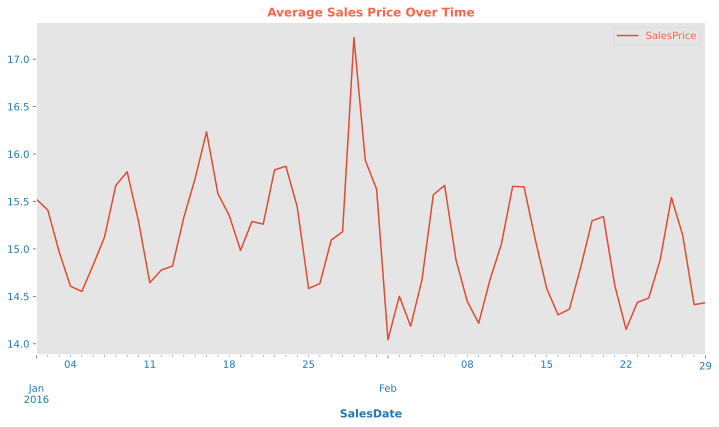

In [ ]:
avg_price_trend = sales.groupby('SalesDate').agg({'SalesPrice': 'mean'})
avg_price_trend.plot(figsize=(12, 6), title='Average Sales Price Over Time')

1) There's a cyclical nature to the sales quantities, which might hint at weekly patterns or trends.

2) A significant peak is noticed around January 25th; this could be attributed to specific events, promotions, or even seasonal demands. However, as we transition into February, there's a noticeable decline in sales, which then appears to stabilize as the month progresses.

3) Spirits like "Smirnoff 80 Proof" emerge as the top sellers, reflecting a steady demand. On the other hand, several products are moving slowly, indicating limited sales. As these products vary in type and brand, a strategic review might be necessary to decide on their continued stocking.


 MAPE: 54.73053211676396
R^2: 0.6958413424597891


<Axes: xlabel='SalesDate'>

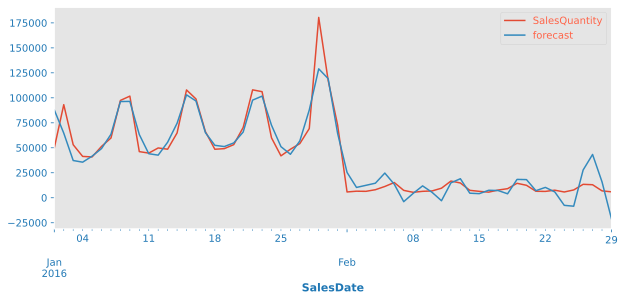

In [ ]:
# ? Attempt using seasonality monthly, because there is only 2 month of data and 1 month change, the model interpret this as every month there is change

from statsmodels.tsa.deterministic import DeterministicProcess, CalendarFourier
from sklearn.linear_model import LinearRegression

sales_quantity_price = sales.groupby("SalesDate").agg({"SalesQuantity": "sum"})
sales_quantity_price.index = pd.to_datetime(sales_quantity_price.index)
sales_quantity_price['week'] = sales_quantity_price.index.month
sales_quantity_price['day'] = sales_quantity_price.index.dayofweek

fourierM = CalendarFourier(freq="M",order=6)

dp = DeterministicProcess(
    index=sales_quantity_price.index,
    constant=True,
    order=4,
    seasonal=True,
    additional_terms=[fourierM],
)

X = dp.in_sample()
model = LinearRegression().fit(X,sales_quantity_price['SalesQuantity'])
y_pred = pd.Series(
  model.predict(X),
  index = X.index,
  name="fitted"
)

sales_quantity_price["forecast"] = y_pred

# * calculate MAPE error
absolute_diff = abs(sales_quantity_price["SalesQuantity"] - sales_quantity_price["forecast"])
relative_diff = absolute_diff / sales_quantity_price["SalesQuantity"] * 100
print("\n MAPE:",relative_diff.dropna().mean())

# Calculate R^2
r2 = 1 - (ssr / sst)
print(f'R^2: {r2}')

sales_quantity_price[["SalesQuantity","forecast"]].plot()


## ABC Analysis

In [ ]:
ABC = (
    sales.groupby("Brand")
    .agg({"SalesQuantity": "sum"})
    .sort_values("SalesQuantity", ascending=False)
)
display(
    "Top 5 Demand",
    ABC.head(),
    "Bottom 5 Demand",
    ABC.tail(),
    "describe data",
    ABC.describe().T,
)
bins = [0, 100, 1000, 30000]
labels = ["C: <100", "B: 100-1k", "A: 1k-30k"]
ABC['bin'] = pd.cut(ABC["SalesQuantity"], bins, labels=labels)

'Top 5 Demand'

,SalesQuantity
Brand,
8111,28544
1892,23121
4261,20226
3606,19200
5111,18411


'Bottom 5 Demand'

,SalesQuantity
Brand,
17576,1
4308,1
4260,1
4164,1
5114,1


'describe data'

,count,mean,std,min,25%,50%,75%,max
SalesQuantity,7658.0,320.079525,1015.017597,1.0,10.0,49.0,238.0,28544.0


Text(0, 0.5, 'Frequency')

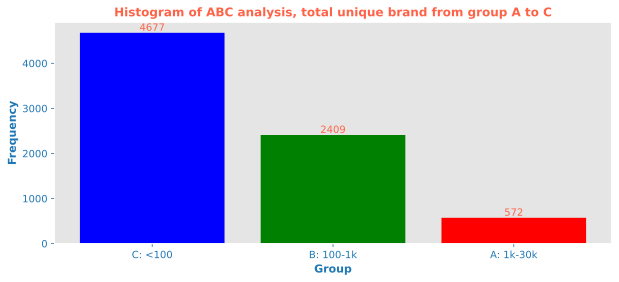

In [ ]:
plt.bar(ABC['bin'].value_counts().index, ABC['bin'].value_counts().values, color=['blue','green','red'])
for i, value in enumerate(ABC['bin'].value_counts().values):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.title('Histogram of ABC analysis, total unique brand from group A to C')
plt.xlabel('Group')
plt.ylabel('Frequency')

In [ ]:
total_group = ABC.groupby('bin').agg({"SalesQuantity":'sum'})['SalesQuantity']
total = px.histogram(total_group.value_counts(), x=total_group.index, y=total_group.values, color=total_group.index, title="ABC analysis, total sales of brand from group A to C",text_auto=True)
total.update_layout(
  width=800,
  height=600,
    xaxis_title='Group',
    yaxis_title='Total_sales',
    bargap=0.1,  # Gap between bars
)
total.show()

<ipython-input-41-1473d405d245>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
# Assuming 'sales' is your original DataFrame
sales_summary = sales.groupby("Brand").agg({"SalesQuantity": "sum", "SalesPrice": "sum"}).sort_values(by=[ "SalesPrice"], ascending=False)

# Displaying results
display(
    "Top 5 by Sales Quantity",
    sales_summary.head(),
    "Bottom 5 by Sales Quantity",
    sales_summary.tail(),
    "Descriptive Statistics",
    sales_summary.describe().T
)
bins = [0, 100, 1000, 30000]
labels = ["C: <100", "B: 100-1k", "A: 1k-30k"]
sales_summary['bin'] = pd.cut(sales_summary["SalesQuantity"], bins, labels=labels)

'Top 5 by Sales Quantity'

,SalesQuantity,SalesPrice
Brand,,
1233,9578,64889.97
8680,4047,61670.62
2589,4649,58509.93
3650,2829,57238.50
3545,11883,52774.51


'Bottom 5 by Sales Quantity'

,SalesQuantity,SalesPrice
Brand,,
2773,1,0.99
3303,1,0.99
5287,2,0.98
5683,128,0.98
5341,11,0.49


'Descriptive Statistics'

,count,mean,std,min,25%,50%,75%,max
SalesQuantity,7658.0,320.079525,1015.017597,1.00,10.000,49.00,238.0000,28544.00
SalesPrice,7658.0,2112.981525,4470.006025,0.49,92.975,519.96,2158.9025,64889.97


<ipython-input-43-51a096c2f328>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



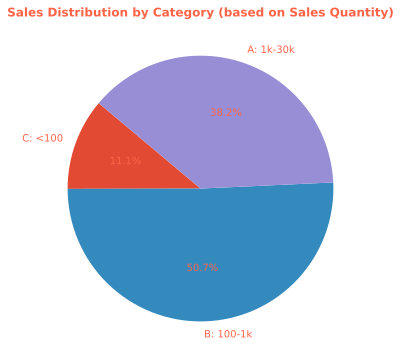

In [ ]:
# Calculate total sales price for each category
category_sales = sales_summary.groupby('bin')['SalesPrice'].sum()

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Category (based on Sales Quantity)')
plt.show()

ABC Analysis:


*  We divided the group into 3 categories based on the sales, A group being group that the company should focus the most since the demand are large, B group is medium moderation, and finally C group that have least moderation.

*  We can sort each group based on the sales data, brands that have less than 100 sales in January and February 2016 are put in the C group, 100 to 1000 sales in the B group, and finally 1000 to 30k (max value)As we can see the majority of brand is in the C group, 4677 brands and some of them only have 1 sales. B Group has 2409 and C Group has 572.

*   C group has a lot of brand and A group is only 12% of C Group. But if we compare the total amount of sales of C group 114k and A group 1.5 mio it is 1300% increase. This means the company should prioritize the A group more in inventory management since there are a lot of demand while C group otherwise.

*  Strategy can vary, R&D to increase quality of C or B group and market them better, create better supply chain for A group, etc.




## Economic Order Quantity (E.O.Q)
 Economic order quantity (EOQ) is the ideal quantity of units a company should purchase to meet demand while minimizing inventory costs such as holding costs, shortage costs, and order costs.

 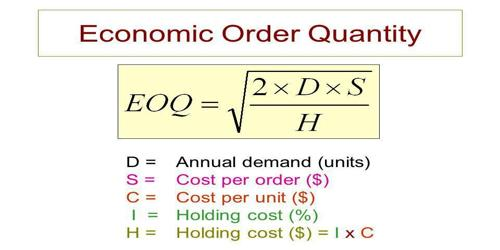




*   Assume I (Holding cost %) to 30% of purchase price

*   EOQ only for 2 months


In [ ]:
# * Demand 2 month
from math import pow, ceil


demand_jan_feb = (

    sales.groupby("Brand")

    .agg({"SalesQuantity": "sum"})

    .sort_values("SalesQuantity", ascending=False)
)


# * Cost Per Order (CPO), Freight Cost

purchase_invoice = pd.merge(
    left=purshases[["PONumber", "Brand", "Description", "Size", "Quantity"]],
    right=purshase_invoices,
    on="PONumber",
    how="right",
)

purchase_invoice_vol = pd.merge(
    left=purchase_invoice,
    right=Purchase_Price[["Brand", "Volume"]],
    on="Brand",
    how="left",
)
purchase_invoice_vol["vol_quantity"] = purchase_invoice_vol["Quantity_x"].astype(
    "float"
) * purchase_invoice_vol["Volume"].astype("float")
purchase_invoice_vol.set_index("PONumber", inplace=True)
purchase_invoice_vol["vol_quantity_total"] = purchase_invoice_vol.groupby(
    "PONumber"
).agg({"vol_quantity": "sum"})
purchase_invoice_vol["CPO"] = (
    purchase_invoice_vol["vol_quantity"]
    / purchase_invoice_vol["vol_quantity_total"]
    * purchase_invoice_vol["Freight"]
)

CPO = purchase_invoice_vol.groupby("Brand").agg({"CPO": "mean"})

# * Cost Per Unit (C), Holding Cost (%) assume holding cost = 30%, Holding Cost ($) = I*C = I*0.3
C = Purchase_Price[["Brand", "PurchasePrice"]].set_index("Brand")
H = C * 0.3

# * Combine to Brand
EOQ = demand_jan_feb.copy()
EOQ["CPO"] = CPO
EOQ["H"] = H

# * Calculate and dropna
EOQ["EOQ"] = 2 * EOQ["SalesQuantity"] * EOQ["CPO"] / EOQ["H"]
EOQ["EOQ"] = EOQ["EOQ"].apply(lambda x: ceil(pow(x, 0.5)) if pd.notna(x) else 0)
EOQ.dropna(inplace=True)
EOQ["Volume"] = Purchase_Price[["Brand", "Volume"]].set_index("Brand")
EOQ['ABC']=ABC['bin']
display(EOQ.head(15), EOQ.describe(),EOQ.groupby("ABC").agg({"EOQ":"mean"}).T)

<ipython-input-49-8ee36d3a3658>:60: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,SalesQuantity,CPO,H,EOQ,Volume,ABC
Brand,,,,,,
8111,28544,0.353193,0.231,296,50,A: 1k-30k
1892,23121,0.353856,0.216,276,50,A: 1k-30k
4261,20226,3.210118,4.851,164,1750,A: 1k-30k
3606,19200,0.360947,0.222,250,50,A: 1k-30k
5111,18411,0.246465,0.216,205,50,A: 1k-30k
3837,14057,0.384953,0.216,224,50,A: 1k-30k
4135,12477,0.371035,0.234,199,50,A: 1k-30k
4157,12102,0.374358,0.216,205,50,A: 1k-30k
3545,11883,2.535400,6.567,96,1750,A: 1k-30k


,SalesQuantity,CPO,H,EOQ
count,6925.000000,6925.000000,6925.000000,6925.000000
mean,353.097473,0.522770,5.177976,9.180939
std,1062.024109,0.464528,11.913410,15.003602
min,1.000000,0.001912,0.114000,1.000000
25%,14.000000,0.288171,2.010000,2.000000
50%,66.000000,0.446238,3.018000,5.000000
75%,284.000000,0.629090,5.199000,11.000000
max,28544.000000,12.124485,687.021000,296.000000


ABC,C: <100,B: 100-1k,A: 1k-30k
EOQ,2.953394,11.538462,42.251748


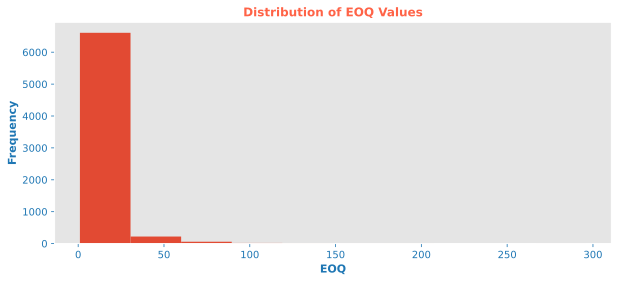

In [ ]:
# Additional calculations or visualizations
EOQ['OrderFrequency'] = 365 / EOQ['EOQ']  # Assuming 365 working days per year

# Create a histogram of EOQ values
plt.hist(EOQ['EOQ'], bins=10)
plt.xlabel('EOQ')
plt.ylabel('Frequency')
plt.title('Distribution of EOQ Values')
plt.show()

Discussion:


*   Freight cost depends on the volume of the liquor, which is why if the volume of the liquor is large then the cost per order is relatively large.

*  Assume holding cost (%) is 30% of the PurchasePrice
For the top demand brand number 8111, the EOQ is 296. Thus per batch (not per 2 month) the ideal order quantity for this brand is 296.






## Reorder Point

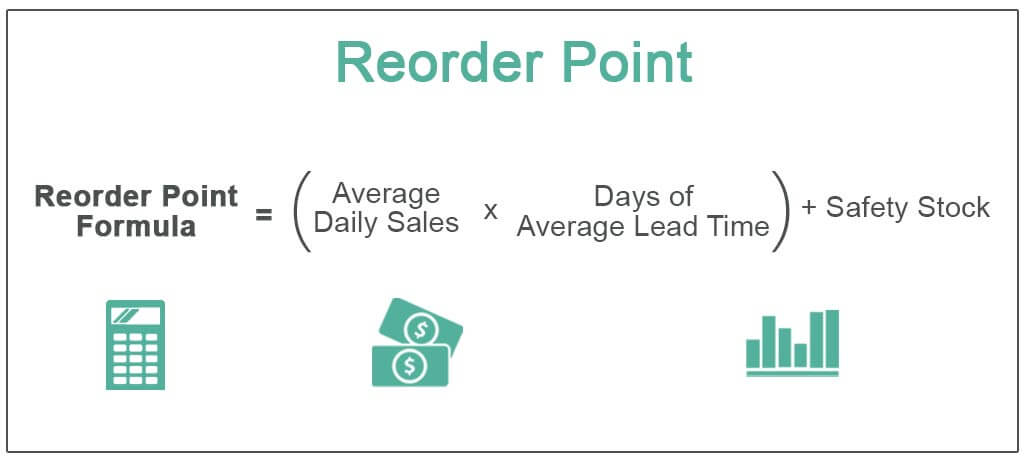

In [ ]:
# * Average Daily Unit Sales
sales_velocity = (
    sales.groupby(["Brand", "Description"]).agg({"SalesQuantity": "sum"}).reset_index()
)
days = (
    pd.to_datetime(sales["SalesDate"]).max() - pd.to_datetime(sales["SalesDate"]).min()
).days
sales_velocity["mean_daily_sales"] = sales_velocity["SalesQuantity"] / days
mean_daily_sales = sales_velocity.set_index("Brand")["mean_daily_sales"]
display(mean_daily_sales.to_frame().T, mean_daily_sales.describe().to_frame().T)

Brand,58,60,61,62,63,72,75,77,79,82,86,100,104,105,106,108,109,111,112,113,114,115,116,117,120,122,123,126,129,143,148,150,151,159,161,162,165,168,171,172,173,174,175,178,184,187,188,189,190,192,...,46599,46600,46621,46628,46662,46664,46684,46694,46725,46734,46762,46763,46764,46765,46766,46783,46785,46788,46802,46816,46819,46826,46829,46830,46923,46934,46942,46947,46950,46985,47009,47011,47014,47027,47075,47090,90010,90011,90012,90013,90014,90025,90080,90081,90082,90084,90085,90086,90087,90089
mean_daily_sales,4.881356,2.101695,0.40678,2.745763,2.220339,0.322034,0.050847,15.389831,7.050847,0.050847,0.016949,0.118644,0.322034,0.016949,2.389831,0.220339,0.491525,0.220339,0.389831,0.271186,0.40678,10.559322,0.152542,0.220339,0.508475,0.067797,0.033898,33.355932,0.016949,0.016949,0.016949,0.016949,0.016949,2.220339,0.135593,1.661017,0.118644,4.474576,8.644068,0.016949,0.491525,0.050847,1.220339,2.525424,0.847458,0.20339,0.20339,0.033898,1.627119,1.118644,...,1.474576,3.372881,2.355932,2.881356,0.20339,0.20339,0.016949,1.118644,0.525424,4.627119,9.254237,2.915254,16.59322,0.084746,0.033898,1.508475,2.355932,2.016949,0.186441,0.745763,0.050847,0.711864,1.050847,10.338983,0.305085,7.711864,0.169492,0.457627,0.169492,3.966102,1.966102,0.050847,5.627119,1.474576,0.067797,2.271186,0.067797,0.525424,0.288136,0.389831,0.237288,0.20339,0.322034,0.118644,0.050847,0.033898,0.033898,0.016949,0.016949,0.457627


,count,mean,std,min,25%,50%,75%,max
mean_daily_sales,7658.0,5.425077,17.203688,0.016949,0.169492,0.830508,4.033898,483.79661


In [ ]:
# * Average Lead Time
purchases["lead_time"] = (
    pd.to_datetime(purchases["ReceivingDate"]) - pd.to_datetime(purchases["PODate"])
).dt.days
lead_time_brand = purchases.groupby("Brand").agg({"lead_time": "mean"})
display(lead_time_brand.T, lead_time_brand.describe().T)

<ipython-input-53-b5d799b891a7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Brand,58,60,61,62,63,70,72,75,77,79,82,86,100,104,106,107,108,109,110,111,112,113,114,115,120,122,126,128,140,143,151,159,161,162,165,168,169,171,173,175,176,178,184,187,188,189,190,192,194,197,...,46662,46663,46694,46715,46725,46733,46734,46762,46763,46764,46765,46774,46783,46785,46788,46802,46816,46817,46819,46826,46829,46830,46882,46923,46928,46934,46942,46947,46950,46985,47009,47011,47014,47027,47075,47090,50354,90010,90011,90012,90013,90014,90080,90085,90086,90087,90089,90604,90609,90631
lead_time,7.806897,7.0,8.533333,7.503125,7.464286,7.333333,8.625,7.0,7.463415,7.384365,6.5,8.0,6.75,8.5,7.88,6.666667,9.333333,8.833333,7.833333,8.625,7.4,7.583333,8.0,7.237685,9.0,11.0,8.024862,6.0,8.0,4.0,8.263158,8.411765,10.0,7.959184,6.516129,7.315385,9.433333,7.914077,4.316456,7.173333,5.5,7.546584,4.223684,6.0,8.0,8.5,9.0,7.507353,8.333333,7.75,...,8.5,8.0,7.413793,8.0,7.846154,6.714286,7.429825,8.369231,7.745763,8.207792,8.666667,10.0,8.625,8.551724,8.366972,7.333333,6.761905,6.0,8.75,8.08,8.333333,8.582031,9.0,7.909091,7.75,7.515152,9.0,8.0,9.0,7.695238,8.141026,6.25,8.263158,7.821782,8.5,7.29661,4.0,6.75,6.4,6.666667,8.0,7.0,12.0,8.5,9.0,5.0,8.5,8.555556,10.1,9.324324


,count,mean,std,min,25%,50%,75%,max
lead_time,8764.0,7.826643,1.269834,3.0,7.221544,7.741157,8.3038,13.0


In [ ]:
# * Safety Stock
max_sales_brand = sales.groupby("Brand").agg({"SalesQuantity": "max"})
safety_stock = (
    max_sales_brand["SalesQuantity"]
    - sales_velocity.set_index("Brand")["mean_daily_sales"]
)
display(safety_stock.to_frame().T, safety_stock.describe().to_frame().T)
# * notice there are negatives to fix this problem we will just set them to 0
safety_stock[safety_stock < 0] = 0

Brand,58,60,61,62,63,72,75,77,79,82,86,100,104,105,106,108,109,111,112,113,114,115,116,117,120,122,123,126,129,143,148,150,151,159,161,162,165,168,171,172,173,174,175,178,184,187,188,189,190,192,...,46599,46600,46621,46628,46662,46664,46684,46694,46725,46734,46762,46763,46764,46765,46766,46783,46785,46788,46802,46816,46819,46826,46829,46830,46923,46934,46942,46947,46950,46985,47009,47011,47014,47027,47075,47090,90010,90011,90012,90013,90014,90025,90080,90081,90082,90084,90085,90086,90087,90089
0,2.118644,0.898305,11.59322,0.254237,1.779661,2.677966,0.949153,-7.389831,-2.050847,2.949153,0.983051,0.881356,2.677966,0.983051,7.610169,2.779661,1.508475,1.779661,5.610169,1.728814,1.59322,1.440678,4.847458,4.779661,3.491525,1.932203,0.966102,52.644068,0.983051,0.983051,0.983051,0.983051,0.983051,8.779661,1.864407,3.338983,1.881356,4.525424,6.355932,0.983051,4.508475,0.949153,4.779661,7.474576,33.152542,11.79661,11.79661,1.966102,70.372881,2.881356,...,4.525424,8.627119,5.644068,6.118644,11.79661,11.79661,0.983051,3.881356,2.474576,7.372881,15.745763,21.084746,9.40678,1.915254,0.966102,2.491525,4.644068,4.983051,2.813559,5.254237,1.949153,5.288136,2.949153,4.661017,11.694915,16.288136,2.830508,2.542373,1.830508,5.033898,10.033898,1.949153,8.372881,5.525424,1.932203,9.728814,1.932203,10.474576,5.711864,11.610169,11.762712,9.79661,7.677966,5.881356,1.949153,0.966102,1.966102,0.983051,0.983051,11.542373


,count,mean,std,min,25%,50%,75%,max
0,7658.0,6.12794,16.949081,-356.79661,1.508475,3.762712,9.525424,407.966102


In [ ]:
# * Reorder Point Analysis
RPA = (lead_time_brand['lead_time'] * mean_daily_sales) + safety_stock
RPA.name = "ReorderPoint"
RPA.dropna(inplace=True)
RPA = RPA.apply(lambda x: ceil(x)).to_frame()
RPA['ABC'] = ABC['bin']
display(RPA.T,RPA.describe().T)

Brand,58,60,61,62,63,72,75,77,79,82,86,100,104,106,108,109,111,112,113,114,115,120,122,126,143,151,159,161,162,165,168,171,173,175,178,184,187,188,189,190,192,194,199,200,201,202,204,207,211,213,...,46554,46555,46568,46580,46582,46583,46590,46599,46600,46621,46628,46662,46694,46725,46734,46762,46763,46764,46765,46783,46785,46788,46802,46816,46819,46826,46829,46830,46923,46934,46942,46947,46950,46985,47009,47011,47014,47027,47075,47090,90010,90011,90012,90013,90014,90080,90085,90086,90087,90089
ReorderPoint,41,16,16,21,19,6,2,115,53,4,2,2,6,27,5,6,4,9,4,5,78,9,3,321,2,2,28,4,17,3,38,75,7,14,27,37,14,14,3,86,12,3,5,9,3,9,2,2,20,11,...,11,9,36,3,71,3,16,15,31,25,28,14,13,7,42,94,44,146,3,16,25,22,5,11,3,12,12,94,15,75,5,7,4,36,27,3,55,18,3,27,3,14,8,15,14,12,3,2,2,16
ABC,B: 100-1k,B: 100-1k,C: <100,B: 100-1k,B: 100-1k,C: <100,C: <100,B: 100-1k,B: 100-1k,C: <100,C: <100,C: <100,C: <100,B: 100-1k,C: <100,C: <100,C: <100,C: <100,C: <100,C: <100,B: 100-1k,C: <100,C: <100,A: 1k-30k,C: <100,C: <100,B: 100-1k,C: <100,C: <100,C: <100,B: 100-1k,B: 100-1k,C: <100,C: <100,B: 100-1k,C: <100,C: <100,C: <100,C: <100,C: <100,C: <100,C: <100,C: <100,C: <100,C: <100,C: <100,C: <100,C: <100,B: 100-1k,C: <100,...,C: <100,C: <100,B: 100-1k,C: <100,B: 100-1k,C: <100,C: <100,C: <100,B: 100-1k,B: 100-1k,B: 100-1k,C: <100,C: <100,C: <100,B: 100-1k,B: 100-1k,B: 100-1k,B: 100-1k,C: <100,C: <100,B: 100-1k,B: 100-1k,C: <100,C: <100,C: <100,C: <100,C: <100,B: 100-1k,C: <100,B: 100-1k,C: <100,C: <100,C: <100,B: 100-1k,B: 100-1k,C: <100,B: 100-1k,C: <100,C: <100,B: 100-1k,C: <100,C: <100,C: <100,C: <100,C: <100,C: <100,C: <100,C: <100,C: <100,C: <100


,count,mean,std,min,25%,50%,75%,max
ReorderPoint,6925.0,54.146715,139.863105,2.0,7.0,17.0,48.0,3748.0


In [ ]:
fig = px.histogram(
    RPA, x="ReorderPoint", color="ABC", nbins=50, title="Reorder Point Analysis distribution", log_y=True
)
fig.update_layout(
    bargap=0.2,
    xaxis_title_text="total_count_brand",  # xaxis label
    yaxis_title_text="ReorderPointBin",  # yaxis label

)
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



The reorder point (ROP) is the minimum stock level a specific product can reach before you’re prompted to order more inventory. A reorder point is not a static number. It’s based on your purchase and sales cycles, and it varies by product. [inflow] It is mainly used to avoid stockouts and avoid overstocking. It reduces the shipping cost and improve forecasting.

discussion:

For this analysis we define safety stock as the maximum sales per day of a brand subtracted by average sales per day of a brand.
As we can see from the Reorder Point Analysis Distribution, the majority of brand (6299 out of 7146) has a reorder point ranging between 0 to 99. Which consists of mostly the C level brands.
There are a couple of outliers when the reorder points reach thousands of bottle of reorder point, mostly the A level brands which is our top gainers and top priority. This makes perfect sense since the velocity of sales is significantly higher than the C level making it more important to have large reorder point to avoid stockout. And the demand of A level is at a constant pace rather than C level which is only ordered once per month, so the products flow rather than stuck in the inventory.

## Lead Time Analysis


In [ ]:
fig = px.histogram(lead_time_brand, x='lead_time', nbins=50, title="Lead Time Analysis distribution",text_auto=True)
fig.update_layout(
    bargap=0.1,
    xaxis_title_text="average_lead_time",  # xaxis label
    yaxis_title_text="total_count_brand",  # yaxis label
    height=600
)
fig.show()

Lead time is the amount of time that passes from the start of a process until its conclusion. [investopedia]. In this case, the lead time is the shipping of liquor which is between submitting a purchase order and receiving the liquor. Lead time is important for production processes and inventory management.

Discussion:

The distribution of average lead time shows a normal distribution, where a collective of brands have a mean lead time of 7.25-8.25 days.
The lowest average lead time is around 2.75-3.25.
With the majority of brands having a lead time more than a week, inventory management strategy needs to adapt to the situation. Ordering new batch needs to be done at least 1 or 2 week in advance in order to avoid inventory level hitting the safety stock or worse stockouts.

## Carrying Cost Analysis



*   nventory carrying cost is the total of all expenses related to storing unsold goods.

*   The total includes intangibles like depreciation and lost opportunity cost as well as warehousing costs.

*   A business' inventory carrying costs will generally total about 20% to 30% of its total inventory value. [investopedia]




In [ ]:
import plotly.graph_objects as go

annual_inventory_value = end_inv.copy()
annual_inventory_value["total_value"] = (
    annual_inventory_value["onHand"] * annual_inventory_value["Price"]
)
brand_inventory_value = annual_inventory_value.groupby("Brand").agg(
    {"Price": "first", "Description": "first", "total_value": "sum", "onHand": "sum"}
)

brand_inventory_value.sort_values("total_value", ascending=False, inplace=True)
brand_inventory_value["RPA"] = RPA["ReorderPoint"]
brand_inventory_value["total_value_if_RPA"] = (
    brand_inventory_value["RPA"] * brand_inventory_value["Price"]
)
brand_inventory_value["total_value_saved_if_RPA"] = (
    brand_inventory_value["total_value"] - brand_inventory_value["total_value_if_RPA"]
)
brand_inventory_value.dropna(inplace=True)

fig = go.Figure()
fig.add_trace(
    go.Histogram(
        x=brand_inventory_value["total_value"],
        name="end of year inventory",
        nbinsx=50,
    )
)
fig.add_trace(
    go.Histogram(
        x=brand_inventory_value["total_value_if_RPA"],
        name="if follow reorder point/optimal level",
        nbinsx=50,
    )
)
fig.update_yaxes(type="log")
fig.update_layout(
    title_text="Total Inventory Value Distribution",
    xaxis_title_text="total inventory value",  # xaxis label
    yaxis_title_text="total number of brands",  # yaxis label
    bargap=0.2,  # gap between bars of adjacent location coordinates
    bargroupgap=0.1,  # gap between bars of the same location coordinates
)

fig.show()

display(brand_inventory_value[['total_value','total_value_if_RPA','total_value_saved_if_RPA']].sum().apply(lambda x: f"${x:,.0f}").to_frame().T)
brand_inventory_value["total_value"] = brand_inventory_value["total_value"].apply(
    lambda x: f"${x:,.0f}"
)
brand_inventory_value["total_value_if_RPA"] = brand_inventory_value[
    "total_value_if_RPA"
].apply(lambda x: f"${x:,.0f}")
brand_inventory_value["total_value_saved_if_RPA"] = brand_inventory_value[
    "total_value_saved_if_RPA"
].apply(lambda x: f"${x:,.0f}")
display(brand_inventory_value.head(10), brand_inventory_value.tail(10))


,total_value,total_value_if_RPA,total_value_saved_if_RPA
0,"$70,063,298","$5,050,990","$65,012,308"


,Price,Description,total_value,onHand,RPA,total_value_if_RPA,total_value_saved_if_RPA
Brand,,,,,,,
1233,34.99,Jack Daniels No 7 Black,"$526,495",15047,1233.0,"$43,143","$483,352"
3545,29.99,Ketel One Vodka,"$502,932",16770,1512.0,"$45,345","$457,587"
2753,59.99,Johnnie Walker Black Label,"$470,862",7849,239.0,"$14,338","$456,524"
8068,23.49,Absolut 80 Proof,"$366,632",15608,1432.0,"$33,638","$332,994"
3405,28.99,Tito's Handmade Vodka,"$355,649",12268,1174.0,"$34,034","$321,615"
4261,20.99,Capt Morgan Spiced Rum,"$351,981",16769,2561.0,"$53,755","$298,226"
2757,28.99,Johnnie Walker Red Label,"$336,371",11603,673.0,"$19,510","$316,861"
2589,37.99,Jameson Irish Whiskey,"$300,957",7922,653.0,"$24,807","$276,149"
1376,20.99,Jim Beam,"$276,648",13180,867.0,"$18,198","$258,450"


,Price,Description,total_value,onHand,RPA,total_value_if_RPA,total_value_saved_if_RPA
Brand,,,,,,,
24752,9.49,A Bichot Petit Chablis,$0,0,14.0,$133,$-133
15729,2.49,Copa di Vino Pnt Grigio,$0,0,31.0,$77,$-77
19347,11.99,The Royal Chenin Blanc,$0,0,2.0,$24,$-24
3058,0.99,Three Olives Vodka,$0,0,15.0,$15,$-15
42797,18.49,Ricardo Santos Malbec Mendza,$0,0,29.0,$536,$-536
25201,18.99,Ch Croix de Jaugue St Emilio,$0,0,21.0,$399,$-399
45993,10.99,Casa Liliana Good Merlot,$0,0,3.0,$33,$-33
2943,119.99,The Macallan 18 Yr Old,$0,0,2.0,$240,$-240
24975,17.99,Tenshen White,$0,0,26.0,$468,$-468


Discussion:

The total inventory value of the company at the end of the year resulted to $79 mio.
The top 10 product based on total inventory value has a total inventory value ranging between  
526
k
t
o
 272k
Keep in mind the reorder points are calculated with only 2 months of sales data, we have no way of telling whether after february the sales goes up (which makes the reorder point up) or down (makes the reorder point goes down). This causes a huge difference in total inventory value at the end of the year and the reorder point (2 months of sales data).
The total amount of inventory value if we respect the reorder point model is around  
5
m
i
o
w
h
i
c
h
s
a
v
e
s
a
r
o
u
n
d
 65 mio. For the top 10 total inventory value brands, it saves around  
250
k
−
 500 k of inventory value. If the carrying cost is around 20-25% of the inventory value then it would save around  
50
k
−
 100 k.
Observing some of the brands that are out of stock at the end of the year, the reorder point suggest that they need to be restocked to the optimal value. This allows the company to have optimal inventory level so that when order comes they can still sell the products, and even if brands become dead stock it will still minimize carrying cost or when it comes to throwing old stocks reduce the amount of loss.